In [2]:
!python -V

Python 2.7.17


In [3]:
import pandas as pd

In [4]:
import pickle

In [12]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# !pip install sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [43]:
df1 = pd.read_parquet('./fhv_tripdata_2021-01.parquet')
df2 = pd.read_parquet('./fhv_tripdata_2021-02.parquet')
df = pd.concat([df1, df2])
print("Jan records in fhv_tripdata_2021-01.parquet", len(df1))

df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

dfJan = df[df['pickup_datetime']<"2021-02-01 00:00:00"]
print("Jan records based on pickup", len(dfJan))
avgTripDurationJan = dfJan["duration"].mean()

print("Average trip duration in January:", avgTripDurationJan)

df = df[(df.duration >= 1) & (df.duration <= 60)]
dfJan2 = df[df['pickup_datetime']<"2021-02-01 00:00:00"]
droppedTrips = len(dfJan) - len(dfJan2)
print("Dropped trips after cleaning by duration:", droppedTrips)


('Jan records in fhv_tripdata_2021-01.parquet', 1154112)
('Jan records based on pickup', 1154112)
('Average trip duration in January:', 19.167224093791006)
('Dropped trips after cleaning by duration:', 44286)


In [59]:
categorical = ['PUlocationID', 'DOlocationID']
# numerical = ['trip_distance']
df[categorical] = df[categorical].fillna(-1)
# df[categorical] = df[categorical].astype(str)

dfMissingPU = df[df["PUlocationID"]==-1]

print("Francion of missing values:")
(dfMissingPU.size * 100.0) / df.size
df

Francion of missing values:


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000
6,B00037,2021-01-01 00:18:12,2021-01-01 00:30:04,-1.0,91.0,None,B00037,11.866667
7,B00037,2021-01-01 00:36:15,2021-01-01 00:45:08,-1.0,39.0,None,B00037,8.883333
8,B00037,2021-01-01 00:55:04,2021-01-01 01:13:02,-1.0,37.0,None,B00037,17.966667
9,B00037,2021-01-01 00:48:40,2021-01-01 01:12:02,-1.0,39.0,None,B00037,23.366667
10,B00037,2021-01-01 00:27:23,2021-01-01 00:29:25,-1.0,72.0,None,B00037,2.033333


In [75]:
# dfJan3 = df[df['pickup_datetime']<"2021-02-01 00:00:00"]
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape


target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)


In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

11.659165511310677

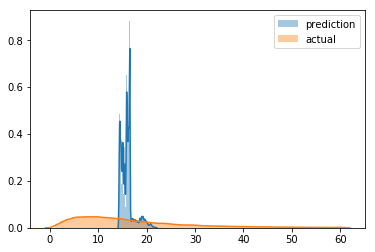

In [77]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [87]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
        df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [88]:
df_train = read_dataframe('./fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./fhv_tripdata_2021-02.parquet')

In [93]:
len(df_train), len(df_val)

(1109826, 990113)

In [92]:
# # dfJan3 = df[df['pickup_datetime']<"2021-02-01 00:00:00"]
# train_dicts = df_train[categorical].to_dict(orient='records')

# dv = DictVectorizer()
# X_train = dv.fit_transform(train_dicts)
# X_train.shape


# target = 'duration'
# y_train = df_train[target].values

# lr = LinearRegression()
# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_train)


In [ ]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# rmse = np.sqrt(mean_squared_error(y_train, y_pred))
# rmse

In [12]:
# df_train['PU_DO'] = df_train['PUlocationID'] + '_' + df_train['DOlocationID']
# df_val['PU_DO'] = df_val['PUlocationID'] + '_' + df_val['DOlocationID']

In [94]:
# categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [95]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [97]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [99]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

11.014281819833963

In [16]:
# with open('models/lin_reg.bin', 'wb') as f_out:
#     pickle.dump((dv, lr), f_out)

In [100]:
# lr = Lasso(0.01)
# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_val)

# mean_squared_error(y_val, y_pred, squared=False)